## LINEAR REGRESSION

#### Types of Linear Regression:
#### ** Simple Linear Regression:
####       It involves relationship between one independent variable(one feature) and one dependent variable(one target)
#### ** Multiple Linear Regression:
####       It involves relationship between two or more independent variables(two or more features) and one dependent variable(one target)

## MULTIPLE REGRESSION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV ## using for shuffle and split the data train and test
import statsmodels.formula.api as sfa ## Statistical information
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load the dataset
df=pd.read_csv('ToyotaCorolla - MLR.csv')

In [3]:
## Display the first few rowss of the data
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
## Information on datatypes and missing value ie NAN 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [5]:
df.shape

(1436, 11)

In [6]:
## missing values
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [7]:
## duplicate values
df.duplicated().sum()

1

In [8]:
## Drop the one duplicates row
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

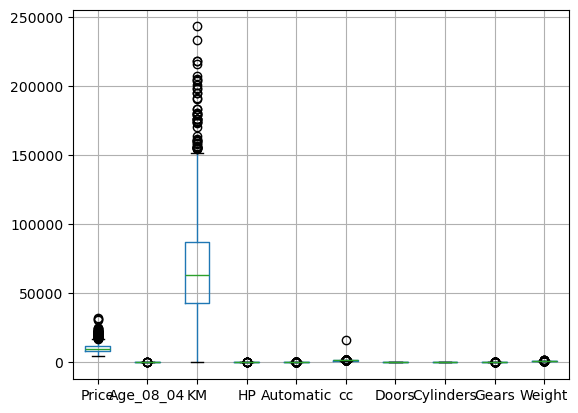

In [10]:
## outlier_detection
df.boxplot()
plt.show()

In [11]:
## outlier_capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df[column]=df[column].apply(lambda x:lower_bound if x<lower_bound else upper_bound if x>upper_bound else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

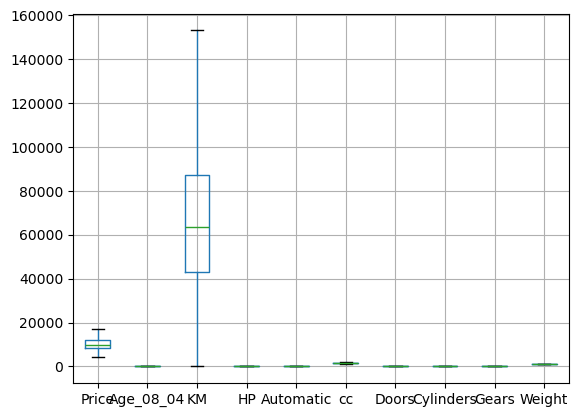

In [12]:
df.boxplot()
plt.show()

In [13]:
# Summary statistics for numerical features
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


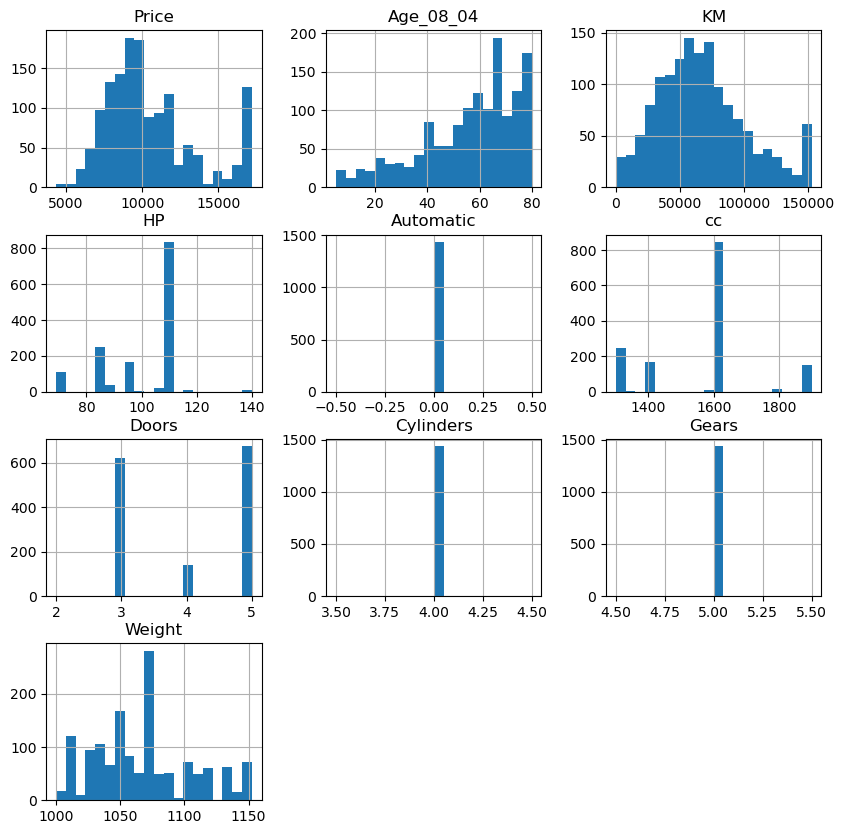

In [14]:
# Histograms for all numerical variables to understand their distribution
df.hist(bins=20, figsize=(10, 10))
plt.show()

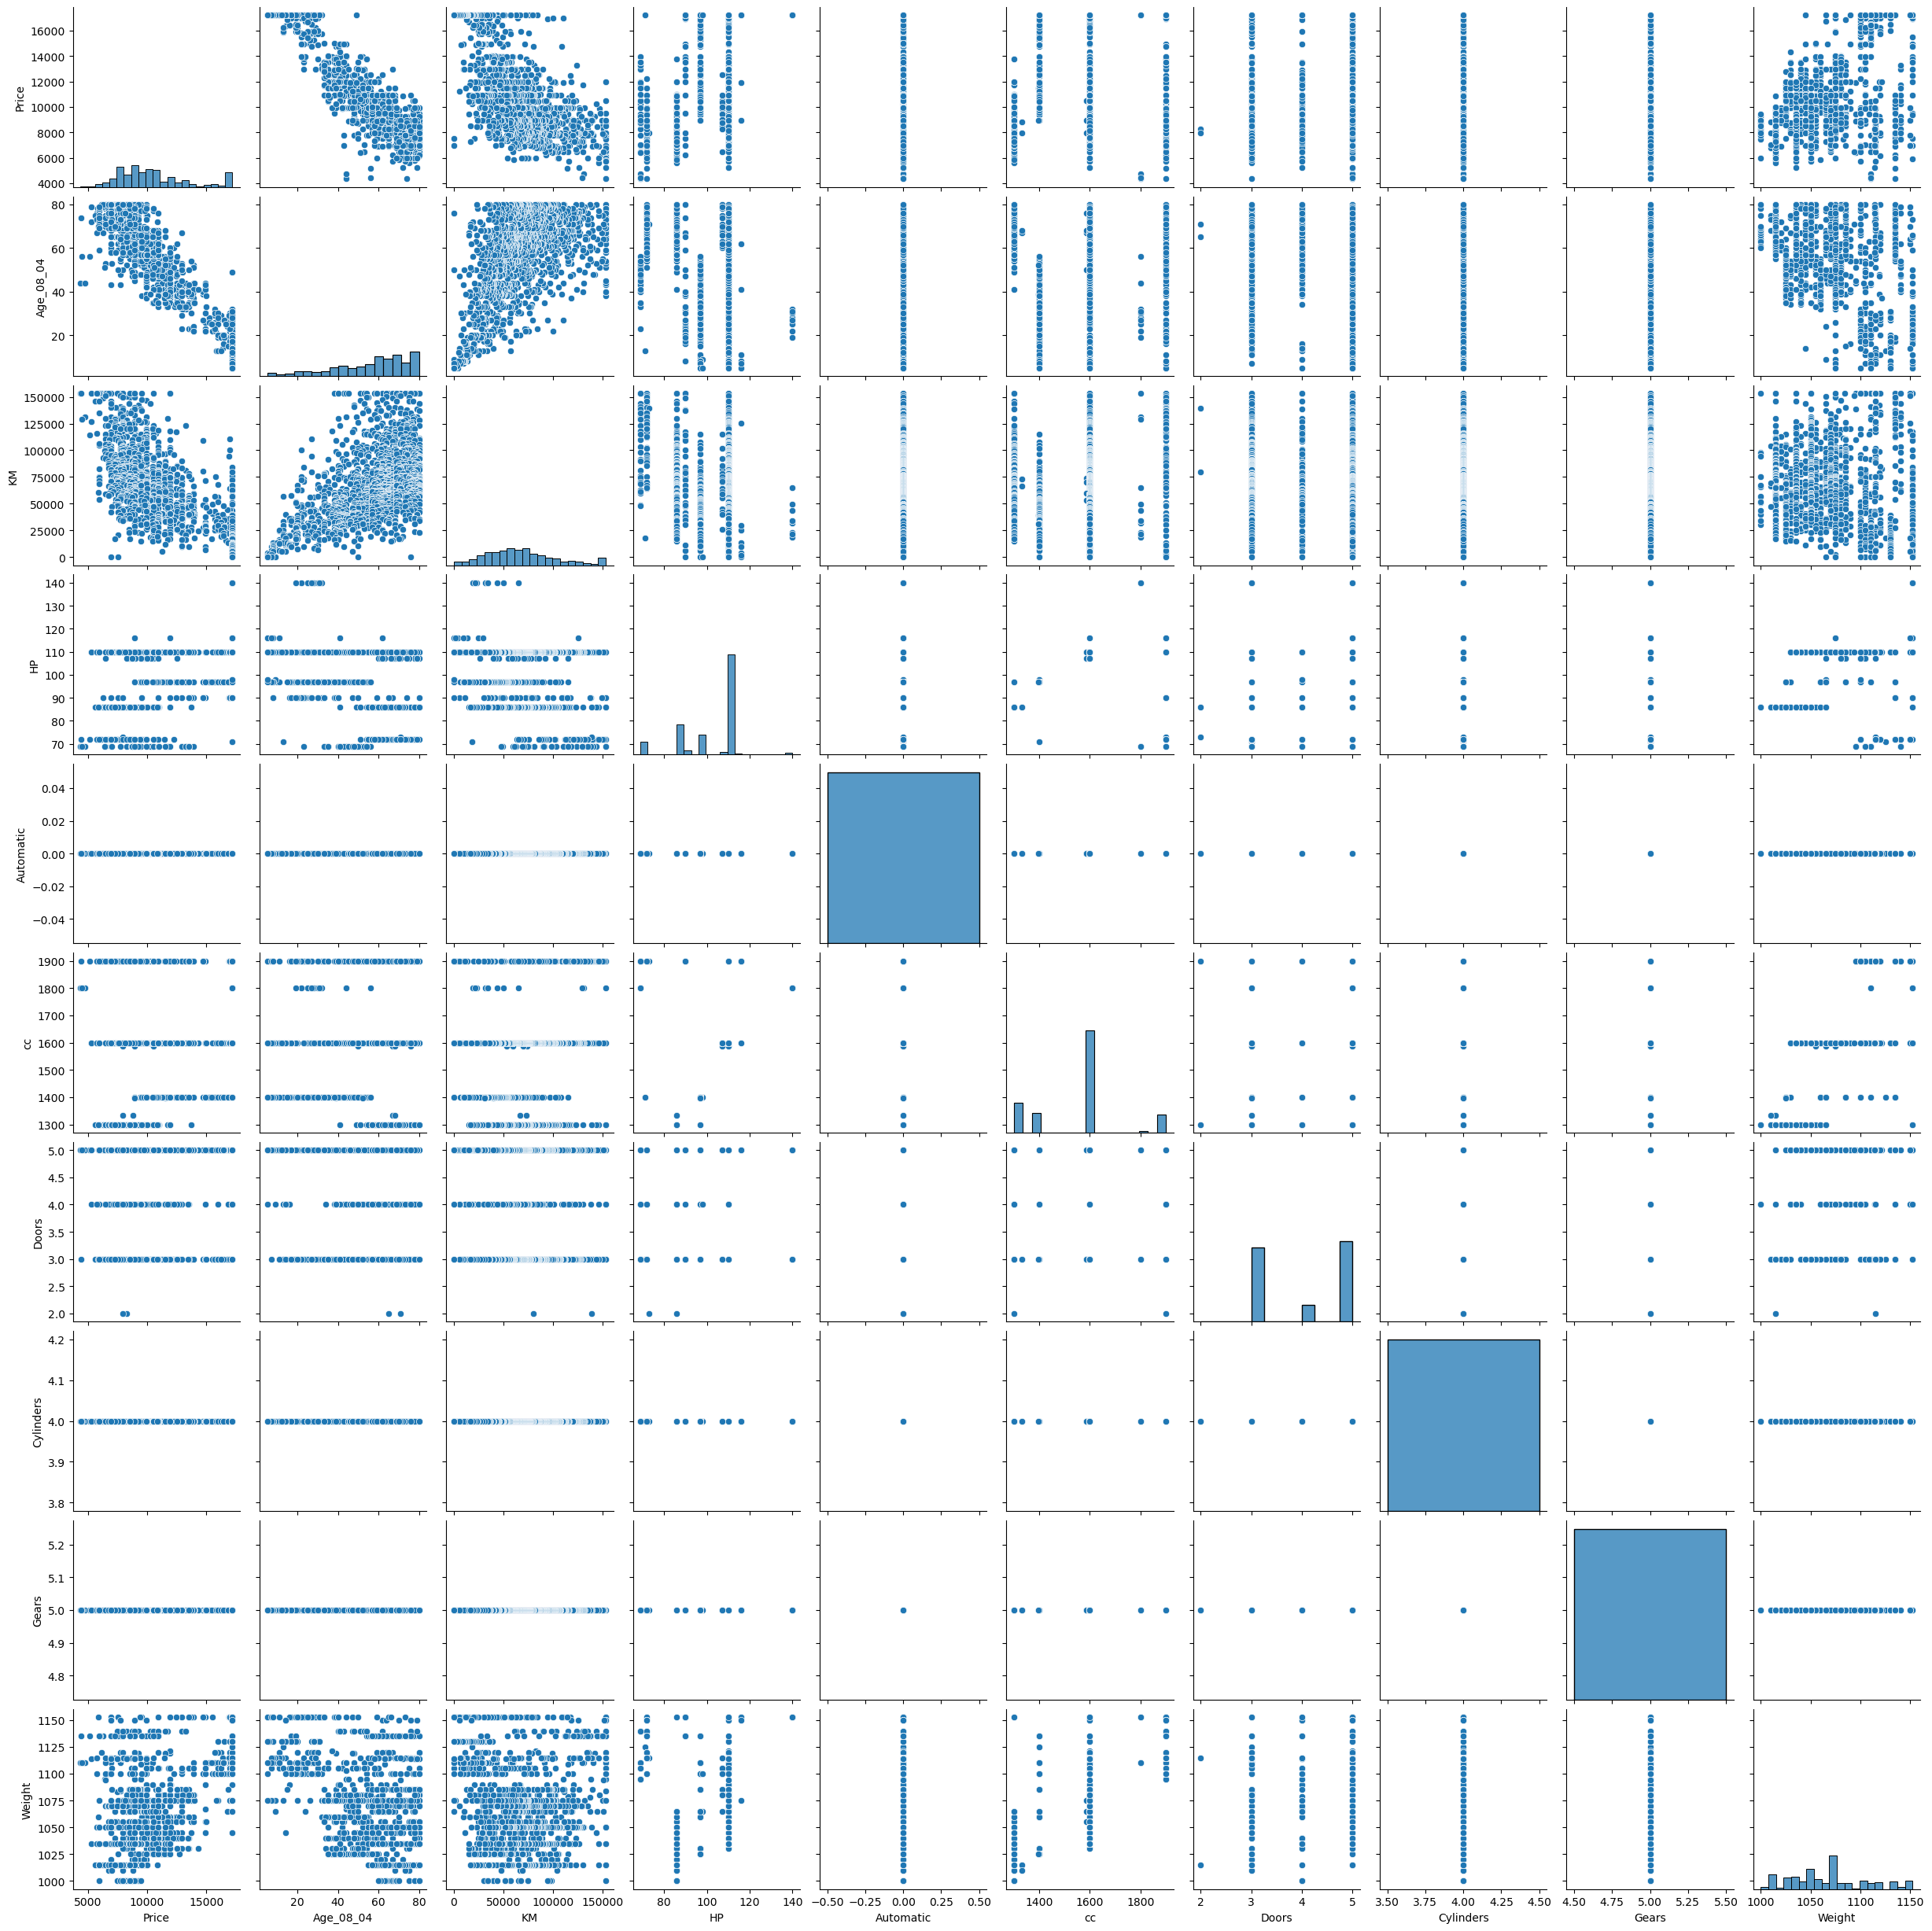

In [15]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df)
plt.show()

In [16]:
# First, convert categorical variables into dummy/indicator variables
df=pd.get_dummies(df,dtype='int',drop_first=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,23.0,46986.0,90.0,0.0,1900.0,3,4,5.0,1152.5,1,0
1,13750.0,23.0,72937.0,90.0,0.0,1900.0,3,4,5.0,1152.5,1,0
2,13950.0,24.0,41711.0,90.0,0.0,1900.0,3,4,5.0,1152.5,1,0
3,14950.0,26.0,48000.0,90.0,0.0,1900.0,3,4,5.0,1152.5,1,0
4,13750.0,30.0,38500.0,90.0,0.0,1900.0,3,4,5.0,1152.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,69.0,20544.0,86.0,0.0,1300.0,3,4,5.0,1025.0,0,1
1432,10845.0,72.0,19000.0,86.0,0.0,1300.0,3,4,5.0,1015.0,0,1
1433,8500.0,71.0,17016.0,86.0,0.0,1300.0,3,4,5.0,1015.0,0,1
1434,7250.0,70.0,16916.0,86.0,0.0,1300.0,3,4,5.0,1015.0,0,1


In [17]:
## drop constant columns:
df_filtered = df.loc[:,df.nunique()>1]

In [18]:
## Feature_selection using correlation matrix heatmap to identify linear relationships
corr_matrix=df_filtered.corr(numeric_only=True)
corr_matrix

,Price,Age_08_04,KM,HP,cc,Doors,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.895340,-0.607949,0.254427,0.129352,0.183010,0.507823,-0.001579,0.014712
Age_08_04,-0.895340,1.000000,0.530670,-0.129602,-0.136644,-0.146704,-0.476150,-0.093084,0.088216
KM,-0.607949,0.530670,1.000000,-0.329729,0.258680,-0.036618,0.000977,0.376921,-0.408052
HP,0.254427,-0.129602,-0.329729,1.000000,0.098192,0.120139,0.024877,-0.601584,0.549942
cc,0.129352,-0.136644,0.258680,0.098192,1.000000,0.138433,0.717782,0.698106,-0.675943
Doors,0.183010,-0.146704,-0.036618,0.120139,0.138433,1.000000,0.381177,0.023538,-0.025746
Weight,0.507823,-0.476150,0.000977,0.024877,0.717782,0.381177,1.000000,0.574681,-0.577437
Fuel_Type_Diesel,-0.001579,-0.093084,0.376921,-0.601584,0.698106,0.023538,0.574681,1.000000,-0.942673
Fuel_Type_Petrol,0.014712,0.088216,-0.408052,0.549942,-0.675943,-0.025746,-0.577437,-0.942673,1.000000


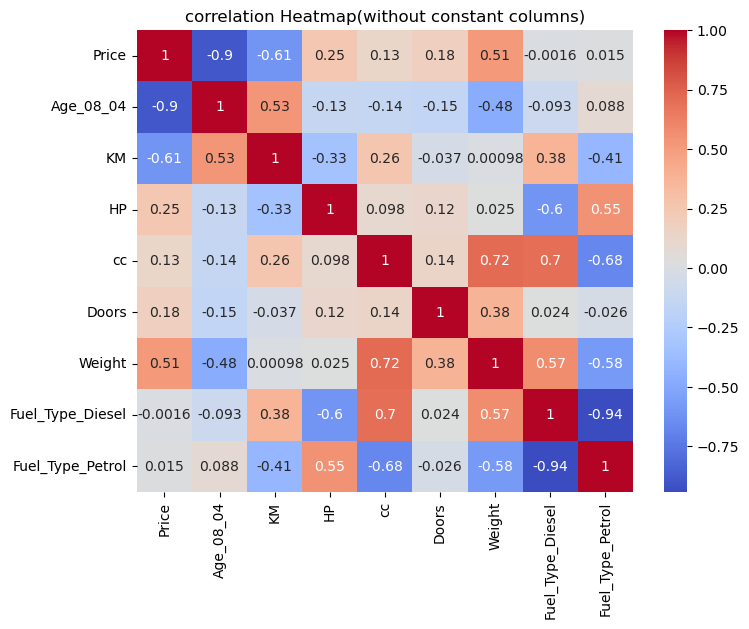

In [19]:
# Display the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("correlation Heatmap(without constant columns)")
plt.show()

In [20]:
## Standardization
std_sca=StandardScaler()
df[['Age_08_04','KM','HP','cc','Weight']]= std_sca.fit_transform(df[['Age_08_04','KM','HP','cc','Weight']])

In [21]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500.0,-1.781129,-0.595118,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
1,13750.0,-1.781129,0.152463,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
2,13950.0,-1.727143,-0.747078,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
3,14950.0,-1.619171,-0.565908,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
4,13750.0,-1.403226,-0.839578,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,0.702234,-1.356844,-1.148522,0.0,-1.531016,3,4,5.0,-1.154108,0,1
1432,10845.0,0.864192,-1.401323,-1.148522,0.0,-1.531016,3,4,5.0,-1.419293,0,1
1433,8500.0,0.810206,-1.458477,-1.148522,0.0,-1.531016,3,4,5.0,-1.419293,0,1
1434,7250.0,0.756220,-1.461357,-1.148522,0.0,-1.531016,3,4,5.0,-1.419293,0,1


In [22]:
# All columns except 'Price' are features
# 'Price' is the target variable
target=df[['Price']]
features= df.drop(columns='Price')

In [23]:
features.head()

,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,-1.781129,-0.595118,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
1,-1.781129,0.152463,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
2,-1.727143,-0.747078,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
3,-1.619171,-0.565908,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0
4,-1.403226,-0.839578,-0.844145,0.0,2.024972,3,4,5.0,2.226997,1,0


In [24]:
target.head()

,Price
0,13500.0
1,13750.0
2,13950.0
3,14950.0
4,13750.0


## 3. Preprocess the dataset
### Split the dataset into features (X) and target (y)

In [25]:
# Split the dataset into training and testing sets (75% train, 25% test)
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1076, 11)
(359, 11)
(1076, 1)
(359, 1)


## 4. Build a Multiple Linear Regression Model

In [26]:
# Initialize the linear regression model
lin_reg1=LinearRegression()

In [27]:
# Fit the model to the training data
lin_reg1.fit(x_train,y_train) ## model_training

LinearRegression()

In [28]:
lin_reg1.coef_

array([[-1.95123475e+03, -4.93262592e+02,  3.49196982e+02,
        -1.30739863e-12, -4.26000692e+02, -9.92091967e+01,
        -3.97903932e-13,  0.00000000e+00,  9.87441738e+02,
         1.30552561e+03,  1.46816543e+03]])

In [75]:
print(x_train.columns.shape)
print(lin_reg1.coef_.shape)

(11,)
(1, 11)


In [76]:
# If lin_reg1.coef_ is 2D (1, n), flatten it
coefficients = pd.DataFrame({
    'Feature': x_train.columns,
    'Coefficient': lin_reg1.coef_.ravel()  # or lin_reg1.coef_[0] if it's 2D
})
print(coefficients)

             Feature   Coefficient
0          Age_08_04 -1.951235e+03
1                 KM -4.932626e+02
2                 HP  3.491970e+02
3          Automatic -1.307399e-12
4                 cc -4.260007e+02
5              Doors -9.920920e+01
6          Cylinders -3.979039e-13
7              Gears  0.000000e+00
8             Weight  9.874417e+02
9   Fuel_Type_Diesel  1.305526e+03
10  Fuel_Type_Petrol  1.468165e+03


In [29]:
lin_reg1.intercept_

array([9449.93293155])

In [30]:
## Model Validation
# Make predictions on the test set
y_pred= lin_reg1.predict(x_test)
rsquare=r2_score(y_test,y_pred)
rsquare

0.8565771907968606

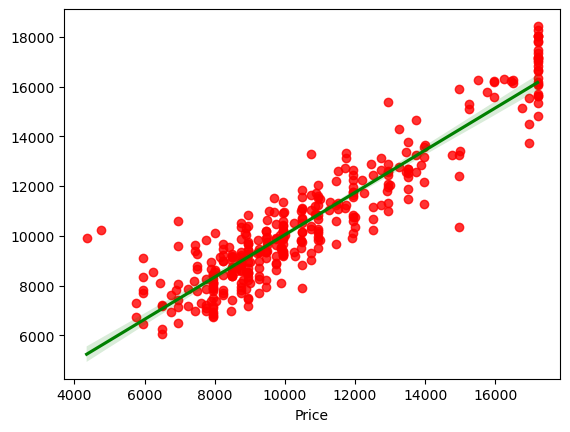

In [31]:
sns.regplot(data=df,x=y_test,y=y_pred,scatter_kws={'color':'red'},line_kws={'color':'green'})
plt.show()

### Evaluate the model performance

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [33]:
## mean_absolute_error
mean_absolute_error(y_test,y_pred)

825.8873673959804

In [43]:
## mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

1262885.9177004131

In [35]:
## mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)*100

8.655768524034622

In [36]:
rsquare

0.8565771907968606

In [37]:
features.shape

(1435, 11)

In [38]:
N=1435
K=11

In [39]:
adj_rsq=1-(((1-rsquare)*(N-1))/(N-K-1))
adj_rsq

0.8554685113160211

In [44]:
# Print the results
print(f"Linear Regression Mean Squared Error: {mse}")
print(f"Linear Regression R² Score: {rsquare}")

Linear Regression Mean Squared Error: 1262885.9177004131
Linear Regression R² Score: 0.8565771907968606


In [41]:
## Multiple linear regression---more feature and one target
## weight,cc,km,hp~price
model1=sfa.ols(formula='Price~Weight+cc+KM+HP+Automatic+Doors+Cylinders+Gears',data=df).fit()

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     452.1
Date:                Wed, 18 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:36:48   Log-Likelihood:                -12750.
No. Observations:                1435   AIC:                         2.551e+04
Df Residuals:                    1428   BIC:                         2.555e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.339e+13   9.37e+13      0.677      0.499    -1.2e+14    2.47e+14
Weight      2150.3719     77.957     27.584      0.000    1997.450    2303.294
cc          -755.6221     76.800     -9.839      0.000    -906.275    -604.969
KM         -1525.3407     54.807    -27.831      0.000   -1632.852   -1417.830
HP           305.9727     51.797      5.907      0.000     204.366     407.580
Automatic   1.374e+11   2.03e+11      0.677      0.499   -2.61e+11    5.36e+11
Doors       -276.9084     54.737     -5.059      0.000    -384.281    -169.535
Cylinders    1.01e+15   1.49e+15      0.677      0.499   -1.92e+15    3.94e+15
Gears      -8.208e+14   1.21e+15     -0.677      0.499    -3.2e+15    1.56e+15
==============================================================================
Omnibus:                       57.828   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.188
Skew:                          -0.264   Prob(JB):                     3.57e-26
Kurtosis:                       4.297   Cond. No.                     1.55e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-58. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### 5. Apply Regularization Techniques: Lasso and Ridge

#### Hyperparameter---Gridsearch

In [54]:
params=dict(alpha=range(1,100))
params

{'alpha': range(1, 100)}

In [55]:
grid_search=GridSearchCV(lasso,params)

In [56]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=1), param_grid={'alpha': range(1, 100)})

In [57]:
grid_search.best_params_

{'alpha': 1}

#### Lasso(L1 Regularization):

In [50]:
lasso=Lasso(alpha=1) ## random number---aplha ## Adjust alpha (regularization strength) as needed
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [58]:
y_pred_lasso=lasso.predict(x_test)

In [59]:
# Evaluate Lasso Regression
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression R² Score: {r2_lasso}")

Lasso Regression Mean Squared Error: 1260749.7899047865
Lasso Regression R² Score: 0.8568197855118476


#### Ridge Regression (L2 Regularization)

In [63]:
## Ridge(L2):
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [64]:
y_pred_ridge = ridge.predict(x_test)

In [65]:
#### Hyperparameter---Gridsearch:
grid_search=GridSearchCV(ridge,params)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=Ridge(alpha=1), param_grid={'alpha': range(1, 100)})

In [66]:
grid_search.best_params_

{'alpha': 1}

In [67]:
# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R² Score: {r2_ridge}")

Ridge Regression Mean Squared Error: 1260422.8866898546
Ridge Regression R² Score: 0.8568569110960084


## 6. Optional: Standardization (for models like Lasso and Ridge to perform better)

In [68]:
# Initialize a standard scaler
scaler = StandardScaler()

In [69]:
# Standardize the training and test datasets
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [70]:
# Apply Lasso on standardized data
lasso_scaled = Lasso(alpha=1)
lasso_scaled.fit(x_train_scaled, y_train)
y_pred_lasso_scaled = lasso_scaled.predict(x_test_scaled)

In [71]:
# Evaluate Lasso on standardized data
mse_lasso_scaled = mean_squared_error(y_test, y_pred_lasso_scaled)
r2_lasso_scaled = r2_score(y_test, y_pred_lasso_scaled)
print(f"Standardized Lasso Regression Mean Squared Error: {mse_lasso_scaled}")
print(f"Standardized Lasso Regression R² Score: {r2_lasso_scaled}")

Standardized Lasso Regression Mean Squared Error: 1262112.819787726
Standardized Lasso Regression R² Score: 0.8566649896018615


In [72]:
# Apply Ridge on standardized data
ridge_scaled = Ridge(alpha=1)
ridge_scaled.fit(x_train_scaled, y_train)
y_pred_ridge_scaled = ridge_scaled.predict(x_test_scaled)

In [73]:
# Evaluate Ridge on standardized data
mse_ridge_scaled = mean_squared_error(y_test, y_pred_ridge_scaled)
r2_ridge_scaled = r2_score(y_test, y_pred_ridge_scaled)
print(f"Standardized Ridge Regression Mean Squared Error: {mse_ridge_scaled}")
print(f"Standardized Ridge Regression R² Score: {r2_ridge_scaled}")

Standardized Ridge Regression Mean Squared Error: 1262622.0776733463
Standardized Ridge Regression R² Score: 0.856607154451797


### Interview Questions:

#### 1.What is Normalization & Standardization and how is it helpful?

#### 2.What techniques can be used to address multicollinearity in multiple linear regression?